In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn import tree
from sklearn.tree import export_graphviz
import altair as alt
from dtreeviz.trees import dtreeviz # will be used for tree visualization
from matplotlib import pyplot as plt
from sklearn.cross_decomposition import PLSRegression
from sklearn.ensemble import GradientBoostingRegressor
alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('default')

## File Import

In [2]:
df = pd.read_csv("../data_input/prod_v1.csv", index_col = None)
df = df.drop(columns = 'Unnamed: 0')
df

,Ts,t,HF,Weight,Tr,sheet_name,compound,condition,exp_no
0,37.9761,0,0.688240,100.0000,25.0000,I1-30-1,I1,30,1
1,37.9745,1,0.669934,99.9798,25.1667,I1-30-1,I1,30,1
2,37.9844,2,0.657603,99.9667,25.3333,I1-30-1,I1,30,1
3,38.0142,3,0.645318,99.9584,25.5000,I1-30-1,I1,30,1
4,38.0930,4,0.653498,99.9616,25.6667,I1-30-1,I1,30,1
...,...,...,...,...,...,...,...,...,...
144176,505.7480,4646,222.131000,51.6847,500.0000,DAO-60-3,DAO,60,3
144177,505.7490,4647,222.124000,51.6847,500.0000,DAO-60-3,DAO,60,3
144178,505.7480,4648,222.116000,51.6847,500.0000,DAO-60-3,DAO,60,3
144179,505.7430,4649,222.110000,51.6847,500.0000,DAO-60-3,DAO,60,3


In [3]:
df.groupby(['compound', 'condition', 'exp_no']).agg('count').reset_index()

,compound,condition,exp_no,Ts,t,HF,Weight,Tr,sheet_name
0,DAO,30,1,4651,4651,4651,4651,4651,4651
1,DAO,30,2,4651,4651,4651,4651,4651,4651
2,DAO,30,3,4651,4651,4651,4651,4651,4651
3,DAO,45,1,4651,4651,4651,4651,4651,4651
4,DAO,45,2,4651,4651,4651,4651,4651,4651
5,DAO,45,3,4651,4651,4651,4651,4651,4651
6,DAO,60,1,4651,4651,4651,4651,4651,4651
7,DAO,60,2,4651,4651,4651,4651,4651,4651
8,DAO,60,3,4651,4651,4651,4651,4651,4651
9,I05,30,1,4651,4651,4651,4651,4651,4651


In [4]:
df.compound.value_counts()

I05    55812
I1     46510
DAO    41859
Name: compound, dtype: int64

In [5]:
def test_train_compound(df, product):
    """
    Function to split test/train data for each compound
    
    Argument:
        df      : pandas dataframe
        product : tbbpa, caoh2, both
        
    Output:
        X_train, X_test, y_train, y_test : 4 pandas dataframe which have the split data 
    """
    df = df.query('compound == @product')
    
    X_train = df.query('exp_no != 3')[["Ts", 't', 'HF', 'Tr', 'condition']]
    y_train = df.query('exp_no != 3')["Weight"]
    
    X_test = df.query('exp_no == 3')[["Ts", 't', 'HF', 'Tr', 'condition']]
    y_test = df.query('exp_no == 3')["Weight"]
    
    return X_train, X_test, y_train, y_test

In [6]:
df_results = pd.DataFrame({'Model': [],
                           'Compound' : [],
                           'Train Accuracy': [],
                           'Test Accuracy' : []
                           })
df_results

,Model,Compound,Train Accuracy,Test Accuracy


## Summary

In [20]:
df_results

,Model,Compound,Train Accuracy,Test Accuracy
NaN,Linear Regression,I05,0.980370,0.960363
NaN,Linear Regression,I1,0.949234,0.898807
NaN,Linear Regression,DAO,0.935379,0.909768
NaN,Partial Least Squares (n=2),I05,0.930866,0.916533
NaN,Partial Least Squares (n=2),I1,0.875976,0.846224
NaN,Partial Least Squares (n=2),DAO,0.863247,0.802622
NaN,Partial Least Squares (n=3),I05,0.935638,0.921121
NaN,Partial Least Squares (n=3),I1,0.911052,0.873614
NaN,Partial Least Squares (n=3),DAO,0.900641,0.864510
NaN,Random Forest Regression (max_depth = 2),I05,0.987050,0.970730


## Linear Modelling

In [7]:
def linear_model(df, product):
    X_train, X_test, y_train, y_test = test_train_compound(df, product)
    print("The 4 matrices for --", product, "-- are of sizes: ", X_train.shape, X_test.shape, y_train.shape, y_test.shape)
    lr = LinearRegression().fit(X_train, y_train.ravel())
    
    
    df_pred = pd.concat([X_test, y_test], axis = 1)
    df_pred['predicted_wt'] = lr.predict(X_test)
    df_pred.to_csv(r'../output/scenario5/prediction_lr_{}.csv'.format(product))
    
    
    print("The training accuracy for the model is ", lr.score(X_train, y_train))
    print("The testing accuracy for the model is ", lr.score(X_test, y_test))
    return pd.DataFrame({'Model': 'Linear Regression',
                           'Train Accuracy': lr.score(X_train, y_train),
                           'Test Accuracy' : lr.score(X_test, y_test),
                           'Compound' : product}, index = [None])
    
for i in df.compound.value_counts().index:
    df_results = df_results.append(linear_model(df, i))
    

The 4 matrices for -- I05 -- are of sizes:  (18604, 5) (37208, 5) (18604,) (37208,)
The training accuracy for the model is  0.9803701586236311
The testing accuracy for the model is  0.9603628475665974
The 4 matrices for -- I1 -- are of sizes:  (13953, 5) (32557, 5) (13953,) (32557,)
The training accuracy for the model is  0.9492341092432033
The testing accuracy for the model is  0.898807315791032
The 4 matrices for -- DAO -- are of sizes:  (13953, 5) (27906, 5) (13953,) (27906,)
The training accuracy for the model is  0.9353786214286923
The testing accuracy for the model is  0.9097679703030204


## PLSR

In [8]:
def pls2(df, product):
    X_train, X_test, y_train, y_test = test_train_compound(df, product)
    print("The 4 matrices for --", product, "-- are of sizes: ", X_train.shape, X_test.shape, y_train.shape, y_test.shape)
    pls2 = PLSRegression(n_components=2).fit(X_train, y_train)
    
    df_pred = pd.concat([X_test, y_test], axis = 1)
    df_pred['predicted_wt'] = pls2.predict(X_test)
    df_pred.to_csv(r'../output/scenario5/prediction_plsr2_{}.csv'.format(product))
    
    print("The training accuracy for the model is ", pls2.score(X_train, y_train))
    print("The testing accuracy for the model is ", pls2.score(X_test, y_test))
    return pd.DataFrame({'Model': 'Partial Least Squares (n=2)',
                           'Train Accuracy': pls2.score(X_train, y_train),
                           'Test Accuracy' : pls2.score(X_test, y_test),
                           'Compound' : i}, index = [None])

for i in df.compound.value_counts().index:
    df_results = df_results.append(pls2(df, i))

The 4 matrices for -- I05 -- are of sizes:  (18604, 5) (37208, 5) (18604,) (37208,)
The training accuracy for the model is  0.9308658938438223
The testing accuracy for the model is  0.916533055740682
The 4 matrices for -- I1 -- are of sizes:  (13953, 5) (32557, 5) (13953,) (32557,)
The training accuracy for the model is  0.8759759987638893
The testing accuracy for the model is  0.8462244291701693
The 4 matrices for -- DAO -- are of sizes:  (13953, 5) (27906, 5) (13953,) (27906,)
The training accuracy for the model is  0.8632465260768909
The testing accuracy for the model is  0.8026219428142913


In [9]:
df_results

,Model,Compound,Train Accuracy,Test Accuracy
NaN,Linear Regression,I05,0.980370,0.960363
NaN,Linear Regression,I1,0.949234,0.898807
NaN,Linear Regression,DAO,0.935379,0.909768
NaN,Partial Least Squares (n=2),I05,0.930866,0.916533
NaN,Partial Least Squares (n=2),I1,0.875976,0.846224
NaN,Partial Least Squares (n=2),DAO,0.863247,0.802622


In [10]:
def pls3(df, product):
    X_train, X_test, y_train, y_test = test_train_compound(df, product)
    print("The 4 matrices for --", product, "-- are of sizes: ", X_train.shape, X_test.shape, y_train.shape, y_test.shape)
    pls3 = PLSRegression(n_components=3).fit(X_train, y_train)
    print("The training accuracy for the model is ", pls3.score(X_train, y_train))
    print("The testing accuracy for the model is ", pls3.score(X_test, y_test))
    
    df_pred = pd.concat([X_test, y_test], axis = 1)
    df_pred['predicted_wt'] = pls3.predict(X_test)
    df_pred.to_csv(r'../output/scenario5/prediction_plsr3_{}.csv'.format(product))
    
    return pd.DataFrame({'Model': 'Partial Least Squares (n=3)',
                           'Train Accuracy': pls3.score(X_train, y_train),
                           'Test Accuracy' : pls3.score(X_test, y_test),
                           'Compound' : i}, index = [None])
for i in df.compound.value_counts().index:
    df_results = df_results.append(pls3(df, i))

The 4 matrices for -- I05 -- are of sizes:  (18604, 5) (37208, 5) (18604,) (37208,)
The training accuracy for the model is  0.9356375155240741
The testing accuracy for the model is  0.9211207557828374
The 4 matrices for -- I1 -- are of sizes:  (13953, 5) (32557, 5) (13953,) (32557,)
The training accuracy for the model is  0.9110518578872506
The testing accuracy for the model is  0.8736142551320809
The 4 matrices for -- DAO -- are of sizes:  (13953, 5) (27906, 5) (13953,) (27906,)
The training accuracy for the model is  0.9006413806438867
The testing accuracy for the model is  0.8645097309838579


## Random forest

In [11]:
def random_forest(df, product):
    X_train, X_test, y_train, y_test = test_train_compound(df, product)
    print("The 4 matrices for --", product, "-- are of sizes: ", X_train.shape, X_test.shape, y_train.shape, y_test.shape)
    rf2 = RandomForestRegressor(random_state=0, max_depth = 2).fit(X_train, y_train)
    
    
    df_pred = pd.concat([X_test, y_test], axis = 1)
    df_pred['predicted_wt'] = rf2.predict(X_test)
    df_pred.to_csv(r'../output/scenario5/prediction_rf2_{}.csv'.format(product))
    
    
    print("The training accuracy for the model is ", rf2.score(X_train, y_train))
    print("The testing accuracy for the model is ", rf2.score(X_test, y_test))
    
    return pd.DataFrame({'Model': 'Random Forest Regression (max_depth = 2)',
                           'Train Accuracy': rf2.score(X_train, y_train),
                           'Test Accuracy' : rf2.score(X_test, y_test),
                           'Compound' : i}, index=[None])

for i in df.compound.value_counts().index:
    df_results = df_results.append(random_forest(df, i))

The 4 matrices for -- I05 -- are of sizes:  (18604, 5) (37208, 5) (18604,) (37208,)
The training accuracy for the model is  0.9870502885359504
The testing accuracy for the model is  0.970729804450318
The 4 matrices for -- I1 -- are of sizes:  (13953, 5) (32557, 5) (13953,) (32557,)
The training accuracy for the model is  0.9786007607300333
The testing accuracy for the model is  0.8567466674095282
The 4 matrices for -- DAO -- are of sizes:  (13953, 5) (27906, 5) (13953,) (27906,)
The training accuracy for the model is  0.9773032085438987
The testing accuracy for the model is  0.8344407332086599


In [12]:
def random_forest(df, product):
    X_train, X_test, y_train, y_test = test_train_compound(df, product)
    print("The 4 matrices for --", product, "-- are of sizes: ", X_train.shape, X_test.shape, y_train.shape, y_test.shape)
    rf5 = RandomForestRegressor(random_state=0, max_depth = 5).fit(X_train, y_train)
    
    df_pred = pd.concat([X_test, y_test], axis = 1)
    df_pred['predicted_wt'] = rf5.predict(X_test)
    df_pred.to_csv(r'../output/scenario5/prediction_rf5_{}.csv'.format(product))
    
    print("The training accuracy for the model is ", rf5.score(X_train, y_train))
    print("The testing accuracy for the model is ", rf5.score(X_test, y_test))
    
    return pd.DataFrame({'Model': 'Random Forest Regression (max_depth = 5)',
                           'Train Accuracy': rf5.score(X_train, y_train),
                           'Test Accuracy' : rf5.score(X_test, y_test),
                           'Compound' : i}, index=[None])

for i in df.compound.value_counts().index:
    df_results = df_results.append(random_forest(df, i))

The 4 matrices for -- I05 -- are of sizes:  (18604, 5) (37208, 5) (18604,) (37208,)
The training accuracy for the model is  0.9995666989882119
The testing accuracy for the model is  0.9804387560731774
The 4 matrices for -- I1 -- are of sizes:  (13953, 5) (32557, 5) (13953,) (32557,)
The training accuracy for the model is  0.998888491714853
The testing accuracy for the model is  0.9262318764369853
The 4 matrices for -- DAO -- are of sizes:  (13953, 5) (27906, 5) (13953,) (27906,)
The training accuracy for the model is  0.9996370288454381
The testing accuracy for the model is  0.8426021238918031


In [13]:
def random_forest(df, product):
    X_train, X_test, y_train, y_test = test_train_compound(df, product)
    print("The 4 matrices for --", product, "-- are of sizes: ", X_train.shape, X_test.shape, y_train.shape, y_test.shape)
    rf7 = RandomForestRegressor(random_state=0, max_depth = 7).fit(X_train, y_train)
    
    df_pred = pd.concat([X_test, y_test], axis = 1)
    df_pred['predicted_wt'] = rf7.predict(X_test)
    df_pred.to_csv(r'../output/scenario5/prediction_rf7_{}.csv'.format(product))
    
    print("The training accuracy for the model is ", rf7.score(X_train, y_train))
    print("The testing accuracy for the model is ", rf7.score(X_test, y_test))
    
    return pd.DataFrame({'Model': 'Random Forest Regression (max_depth = 7)',
                           'Train Accuracy': rf7.score(X_train, y_train),
                           'Test Accuracy' : rf7.score(X_test, y_test),
                           'Compound' : i}, index=[None])

for i in df.compound.value_counts().index:
    df_results = df_results.append(random_forest(df, i))

The 4 matrices for -- I05 -- are of sizes:  (18604, 5) (37208, 5) (18604,) (37208,)
The training accuracy for the model is  0.9999297262259835
The testing accuracy for the model is  0.9807549263248933
The 4 matrices for -- I1 -- are of sizes:  (13953, 5) (32557, 5) (13953,) (32557,)
The training accuracy for the model is  0.9999448614746217
The testing accuracy for the model is  0.9352716139641717
The 4 matrices for -- DAO -- are of sizes:  (13953, 5) (27906, 5) (13953,) (27906,)
The training accuracy for the model is  0.9999741125786494
The testing accuracy for the model is  0.8426488771865699


In [14]:
def random_forest(df, product):
    X_train, X_test, y_train, y_test = test_train_compound(df, product)
    print("The 4 matrices for --", product, "-- are of sizes: ", X_train.shape, X_test.shape, y_train.shape, y_test.shape)
    rf10 = RandomForestRegressor(random_state=0, max_depth = 10).fit(X_train, y_train)
    
    df_pred = pd.concat([X_test, y_test], axis = 1)
    df_pred['predicted_wt'] = rf10.predict(X_test)
    df_pred.to_csv(r'../output/scenario5/prediction_rf10_{}.csv'.format(product))
    
    print("The training accuracy for the model is ", rf10.score(X_train, y_train))
    print("The testing accuracy for the model is ", rf10.score(X_test, y_test))
    
    return pd.DataFrame({'Model': 'Random Forest Regression (max_depth = 10)',
                           'Train Accuracy': rf10.score(X_train, y_train),
                           'Test Accuracy' : rf10.score(X_test, y_test),
                           'Compound' : i}, index=[None])

for i in df.compound.value_counts().index:
    df_results = df_results.append(random_forest(df, i))

The 4 matrices for -- I05 -- are of sizes:  (18604, 5) (37208, 5) (18604,) (37208,)
The training accuracy for the model is  0.9999978280415228
The testing accuracy for the model is  0.9806712599543587
The 4 matrices for -- I1 -- are of sizes:  (13953, 5) (32557, 5) (13953,) (32557,)
The training accuracy for the model is  0.9999994080424899
The testing accuracy for the model is  0.9370959288666698
The 4 matrices for -- DAO -- are of sizes:  (13953, 5) (27906, 5) (13953,) (27906,)
The training accuracy for the model is  0.9999981358387684
The testing accuracy for the model is  0.8431357489136395


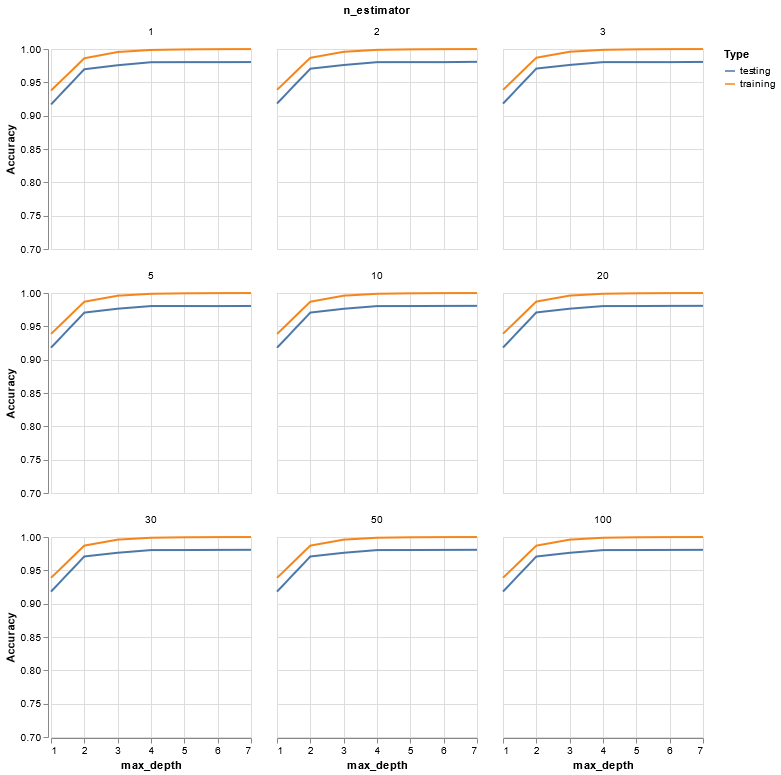

In [19]:
n_est = [1,2,3,5,10,20,30,50,100]
max_depth = range(1,8)
X_train, X_test, y_train, y_test = test_train_compound(df, "I05")
trees = []
train_acc = []
test_acc = []
depth = []
for j in max_depth:
    for i in n_est:
        trees.append(i)
        depth.append(j)
        rf = RandomForestRegressor(n_estimators = i, max_depth = j, random_state=0).fit(X_train, y_train)
        train_acc.append(rf.score(X_train, y_train))
        test_acc.append(rf.score(X_test, y_test))
        #print(j,i)
df_rf = pd.DataFrame({'training' : train_acc,
                      'testing' : test_acc,
                      'n_estimator' : trees,
                      'max_depth' : depth})
df_rf = df_rf.melt(id_vars = ['n_estimator', 'max_depth'], var_name = 'Type', value_name = 'Accuracy')
df_rf
alt.Chart(df_rf).mark_line().encode(
    alt.X('max_depth'),
    alt.Y('Accuracy', scale=alt.Scale(domain=[0.7, 1])),
    alt.Color('Type'),
    alt.Facet('n_estimator')
    ).properties(width = 200, height = 200, columns = 3)

## SVR

In [16]:
def svr_rbf(df, product):
    X_train, X_test, y_train, y_test = test_train_compound(df, product)
    print("The 4 matrices for --", product, "-- are of sizes: ", X_train.shape, X_test.shape, y_train.shape, y_test.shape)
    svr_rbf = SVR(kernel="rbf").fit(X_train, y_train)
    
    df_pred = pd.concat([X_test, y_test], axis = 1)
    df_pred['predicted_wt'] = svr_rbf.predict(X_test)
    df_pred.to_csv(r'../output/scenario5/prediction_svr_rbf_{}.csv'.format(product))
    
    print("The training accuracy for the model is ", svr_rbf.score(X_train, y_train))
    print("The testing accuracy for the model is ", svr_rbf.score(X_test, y_test))
    
    return pd.DataFrame({'Model': 'SVR RBF Kernel',
                           'Train Accuracy': svr_rbf.score(X_train, y_train),
                           'Test Accuracy' : svr_rbf.score(X_test, y_test),
                           'Compound' : i}, index=[None])

for i in df.compound.value_counts().index:
    df_results = df_results.append(svr_rbf(df, i))

The 4 matrices for -- I05 -- are of sizes:  (18604, 5) (37208, 5) (18604,) (37208,)
The training accuracy for the model is  0.9836350890026736
The testing accuracy for the model is  0.9665478229785168
The 4 matrices for -- I1 -- are of sizes:  (13953, 5) (32557, 5) (13953,) (32557,)
The training accuracy for the model is  0.9208341585258116
The testing accuracy for the model is  0.876823558571829
The 4 matrices for -- DAO -- are of sizes:  (13953, 5) (27906, 5) (13953,) (27906,)
The training accuracy for the model is  0.9231098627496396
The testing accuracy for the model is  0.8888684423226497


## GBR

In [17]:
def gbr(df, product):
    X_train, X_test, y_train, y_test = test_train_compound(df, product)
    print("The 4 matrices for --", product, "-- are of sizes: ", X_train.shape, X_test.shape, y_train.shape, y_test.shape)
    gbr = GradientBoostingRegressor().fit(X_train,y_train)
    
    df_pred = pd.concat([X_test, y_test], axis = 1)
    df_pred['predicted_wt'] = gbr.predict(X_test)
    df_pred.to_csv(r'../output/scenario5/prediction_gbr_{}.csv'.format(product))
    
    print("The training accuracy for the model is ", gbr.score(X_train, y_train))
    print("The testing accuracy for the model is ", gbr.score(X_test, y_test))
    
    return pd.DataFrame({'Model': 'Gradient Boost Regressor',
                           'Train Accuracy': gbr.score(X_train, y_train),
                           'Test Accuracy' : gbr.score(X_test, y_test),
                           'Compound' : i}, index=[None])

for i in df.compound.value_counts().index:
    df_results = df_results.append(gbr(df, i))

The 4 matrices for -- I05 -- are of sizes:  (18604, 5) (37208, 5) (18604,) (37208,)
The training accuracy for the model is  0.9999332256449887
The testing accuracy for the model is  0.9808097634715094
The 4 matrices for -- I1 -- are of sizes:  (13953, 5) (32557, 5) (13953,) (32557,)
The training accuracy for the model is  0.9998945556437243
The testing accuracy for the model is  0.9432066608205741
The 4 matrices for -- DAO -- are of sizes:  (13953, 5) (27906, 5) (13953,) (27906,)
The training accuracy for the model is  0.9999547193854126
The testing accuracy for the model is  0.8521466499679675


In [18]:
df_results.to_csv('../output/scenario5/results_table.csv')